<a href="https://colab.research.google.com/github/PhuocPhat19146046/PhuocPhat19146046/blob/main/Fashion_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4431872/4422102 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


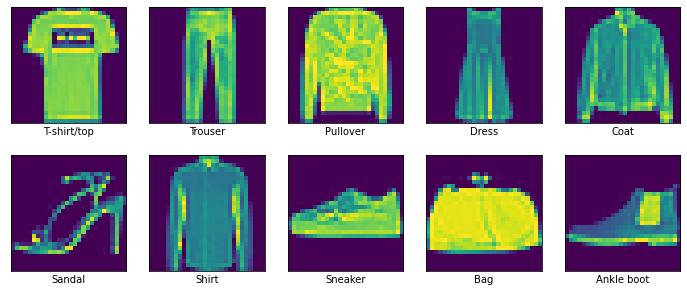

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import Dense , Activation, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import load_img,img_to_array
from keras.datasets import fashion_mnist
from keras.backend import categorical_crossentropy
from tensorflow.keras.optimizers import  SGD

fashion={0:	'T-shirt/top',
        1:	'Trouser',
        2:	'Pullover',
        3:	'Dress',
        4:	'Coat',
        5:	'Sandal',
        6:	'Shirt',
        7:	'Sneaker',
        8:	'Bag',
        9:	'Ankle boot'}
(x_train,y_train),(x_test,y_test)= fashion_mnist.load_data()
plt.figure(figsize=(12,5))
j=0
for i in range(200):
  plt.subplot(2,5,j+1)
  plt.xticks([])
  plt.yticks([])
  if(y_train[i]==j):
    plt.imshow(x_train[i])
    j+=1
    plt.xlabel(fashion[y_train[i]])
  if(j==10):  break
plt.show()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float')
x_test=x_test.astype('float')
x_train/=255
x_test/=255
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='Softmax'))
model.summary()
opt=SGD(learning_rate=0.001,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=50,batch_size=64,validation_data=(x_test,y_test),verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
938/938 [==============================] - 8s 7ms/step - loss: 0.8146 - accuracy: 0.7407 - val_loss: 0.5876 - val_accuracy: 0.7979
Epoch 2/50
938/938 [==============================] - 6s 6ms/step - loss: 0.5191 - accuracy: 0.8235 - val_loss: 0.5210 - val_accuracy: 0.8174
Epoch 3/50
938/938 [==========

In [ ]:
#model.save('drive/MyDrive/Colab Notebooks/model/fashion_ANN.h5')

In [ ]:
from tensorflow.keras.models import load_model
model_1=load_model('drive/MyDrive/Colab Notebooks/model/fashion_ANN.h5')

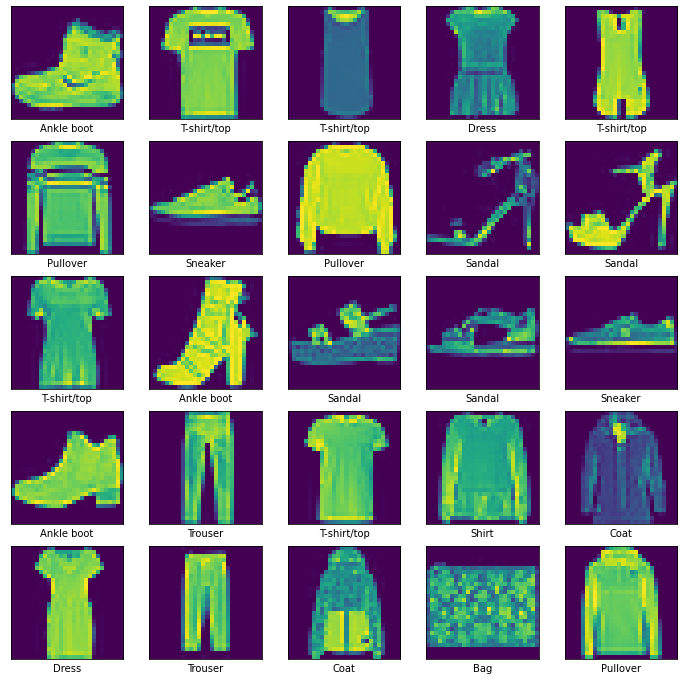

In [ ]:
import matplotlib.pyplot as plt
fashion={0:	'T-shirt/top',
        1:	'Trouser',
        2:	'Pullover',
        3:	'Dress',
        4:	'Coat',
        5:	'Sandal',
        6:	'Shirt',
        7:	'Sneaker',
        8:	'Bag',
        9:	'Ankle boot'}

plt.figure(figsize=(12,12))
for i in range(25):
  (x_train,y_train),(x_test,y_test)= fashion_mnist.load_data()
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  x_train=x_train.reshape(60000,784)
  x_train=x_train.astype('float')
  x_train/=255
  plt.xlabel(fashion[np.argmax(model_1.predict(x_train),axis=1)[i]])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
fashion={0:	'T-shirt/top',
        1:	'Trouser',
        2:	'Pullover',
        3:	'Dress',
        4:	'Coat',
        5:	'Sandal',
        6:	'Shirt',
        7:	'Sneaker',
        8:	'Bag',
        9:	'Ankle boot'}
(x_train,y_train),(x_test,y_test)= fashion_mnist.load_data()
x_train=x_train.reshape(60000,784)
x_train=x_train.astype('float')
x_train/=255
fashion[np.argmax(model_1.predict(x_train),axis=1)[1]]

'T-shirt/top'